<a href="https://colab.research.google.com/github/JersonC23/Clase-4-marzo/blob/main/PEP-MDLZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload PEP Excel file


Saving PEP.xlsx to PEP (3).xlsx
Please upload MDLZ Excel file


Saving MDLZ.xlsx to MDLZ (3).xlsx

PEP DataFrame columns: ['Date', '\xa0Open', '\xa0High', '\xa0Low', ' Close', '\xa0Volume']
MDLZ DataFrame columns: ['Date', '\xa0Open', '\xa0High', '\xa0Low', ' Close', '\xa0Volume']
Found ' Close' in both DataFrames, using it for closing prices

Unit Root Tests for PEP:
ADF Test:
ADF Statistic: -1.7685
p-value: 0.3962
Critical Values: {'1%': -3.453102162983312, '5%': -2.871558538275452, '10%': -2.5721082282996433}
Interpretation:
  - p-value >= 0.05: Fail to reject null - PEP may be non-stationary

KPSS Test:
KPSS Statistic: 1.2888
p-value: 0.0100
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Interpretation:
  - p-value < 0.05: Reject null hypothesis - PEP is non-stationary

Unit Root Tests for MDLZ:
ADF Test:
ADF Statistic: -1.1058
p-value: 0.7127
Critical Values: {'1%': -3.4530232710482367, '5%': -2.871523926671883, '10%': -2.5720897694878424}
Interpretation:
  - p-value >= 0.05: Fail to reject null - MDLZ may be non-stat

<ipython-input-4-266d96fbd336>:69: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series)
<ipython-input-4-266d96fbd336>:69: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/sta


Best ARIMA model for PEP:
Order: (0, 1, 0)
AIC: 1186.13
Interpretation:
  - p=0: 0 autoregressive term(s)
  - d=1: 1 difference(s) needed for stationarity
  - q=0: 0 moving average term(s)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/st


Best ARIMA model for MDLZ:
Order: (0, 1, 0)
AIC: 685.31
Interpretation:
  - p=0: 0 autoregressive term(s)
  - d=1: 1 difference(s) needed for stationarity
  - q=0: 0 moving average term(s)


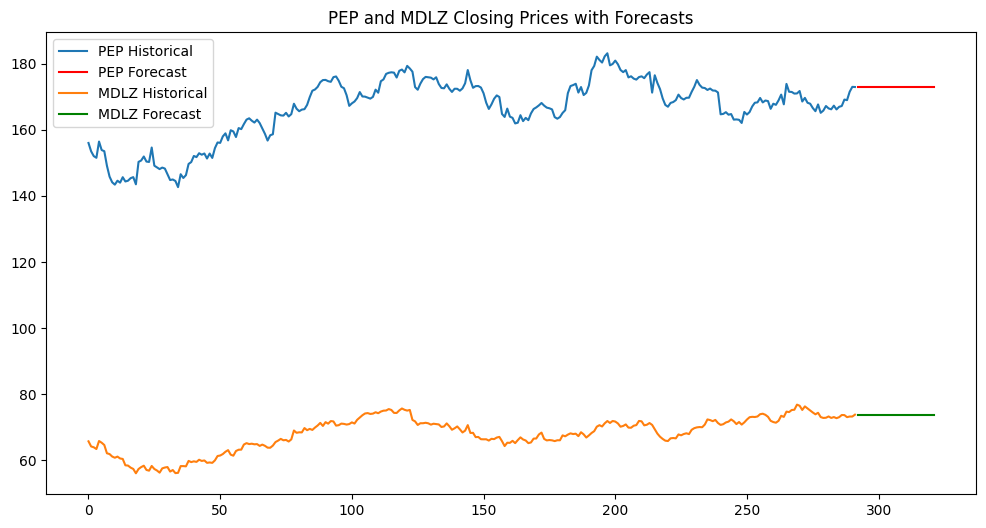

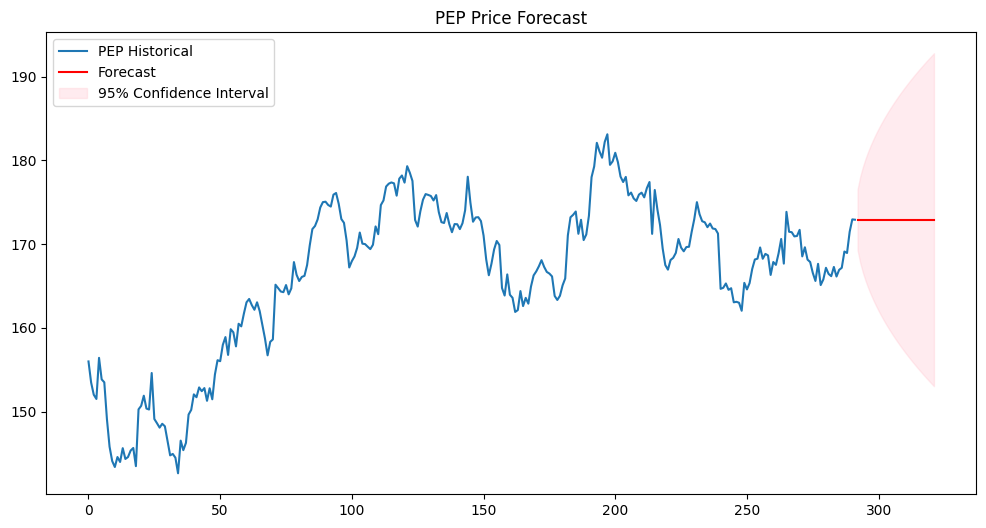


Forecast Interpretation for PEP:
Last observed value: 172.91
Average forecast value: 172.91
Forecast change: -0.00
Trend: Downward forecast trend
95% CI range at period 30: [153.04, 192.78]


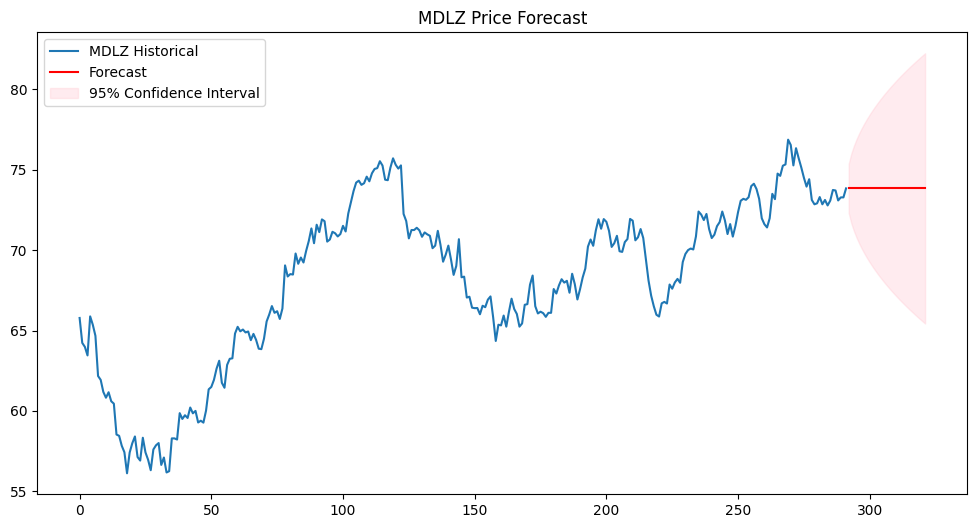


Forecast Interpretation for MDLZ:
Last observed value: 73.84
Average forecast value: 73.84
Forecast change: 0.00
Trend: Flat forecast trend
95% CI range at period 30: [65.44, 82.24]

PEP Forecast Values (next 5 periods):
292    172.91
293    172.91
294    172.91
295    172.91
296    172.91
Name: predicted_mean, dtype: float64

MDLZ Forecast Values (next 5 periods):
292    73.84
293    73.84
294    73.84
295    73.84
296    73.84
Name: predicted_mean, dtype: float64


In [4]:
# Import required libraries
import pandas as pd
import numpy as np
from google.colab import files
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import matplotlib.pyplot as plt

# Upload Excel files
print("Please upload PEP Excel file")
pep_upload = files.upload()
pep_filename = list(pep_upload.keys())[0]
pep_df = pd.read_excel(pep_filename)

print("Please upload MDLZ Excel file")
mdlz_upload = files.upload()
mdlz_filename = list(mdlz_upload.keys())[0]
mdlz_df = pd.read_excel(mdlz_filename)

# Print available columns
print("\nPEP DataFrame columns:", list(pep_df.columns))
print("MDLZ DataFrame columns:", list(mdlz_df.columns))

# Check for " Close" specifically since we know it has a leading space
expected_column = " Close"
if expected_column in pep_df.columns and expected_column in mdlz_df.columns:
    close_column = expected_column
    print(f"Found '{expected_column}' in both DataFrames, using it for closing prices")
else:
    # Fallback to user input if " Close" isn't found
    while True:
        close_column = input("Please enter the column name containing closing prices (note: it might be ' Close' with a space): ").strip()
        if close_column in pep_df.columns and close_column in mdlz_df.columns:
            break
        else:
            print(f"Error: '{close_column}' not found in one or both DataFrames")
            print("PEP columns:", list(pep_df.columns))
            print("MDLZ columns:", list(mdlz_df.columns))
            print("Please enter a valid column name that exists in both DataFrames")

# Extract closing prices using verified column name
pep_close = pep_df[close_column]
mdlz_close = mdlz_df[close_column]

# Ensure both series have the same length
min_length = min(len(pep_close), len(mdlz_close))
pep_close = pep_close[:min_length]
mdlz_close = mdlz_close[:min_length]

# Function for unit root tests with interpretation
def unit_root_tests(series, name):
    print(f"\nUnit Root Tests for {name}:")

    # ADF Test
    adf_result = adfuller(series)
    print("ADF Test:")
    print(f'ADF Statistic: {adf_result[0]:.4f}')
    print(f'p-value: {adf_result[1]:.4f}')
    print(f'Critical Values: {adf_result[4]}')
    print("Interpretation:")
    if adf_result[1] < 0.05:
        print(f"  - p-value < 0.05: Reject null hypothesis - {name} is stationary")
    else:
        print(f"  - p-value >= 0.05: Fail to reject null - {name} may be non-stationary")

    # KPSS Test
    kpss_result = kpss(series)
    print("\nKPSS Test:")
    print(f'KPSS Statistic: {kpss_result[0]:.4f}')
    print(f'p-value: {kpss_result[1]:.4f}')
    print(f'Critical Values: {kpss_result[3]}')
    print("Interpretation:")
    if kpss_result[1] < 0.05:
        print(f"  - p-value < 0.05: Reject null hypothesis - {name} is non-stationary")
    else:
        print(f"  - p-value >= 0.05: Fail to reject null - {name} may be stationary")

# Perform unit root tests
unit_root_tests(pep_close, "PEP")
unit_root_tests(mdlz_close, "MDLZ")

# Cointegration test with interpretation
def cointegration_test(df):
    result = coint_johansen(df, det_order=0, k_ar_diff=1)
    print("\nJohansen Cointegration Test:")
    print(f"Trace statistic: {result.lr1}")
    print(f"Critical values (90%, 95%, 99%): {result.cvt}")
    print("Interpretation:")
    for i in range(len(result.lr1)):
        if result.lr1[i] > result.cvt[i, 1]:
            print(f"  - r = {i}: Cointegration exists at 95% confidence level")
            print(f"    Trace statistic ({result.lr1[i]:.2f}) > 95% critical value ({result.cvt[i, 1]:.2f})")
        else:
            print(f"  - r = {i}: No cointegration at 95% confidence level")
            print(f"    Trace statistic ({result.lr1[i]:.2f}) <= 95% critical value ({result.cvt[i, 1]:.2f})")
    if result.lr1[0] > result.cvt[0, 1]:
        print("Conclusion: PEP and MDLZ are cointegrated - they share a long-run equilibrium relationship")
    else:
        print("Conclusion: No evidence of cointegration between PEP and MDLZ")

# Prepare data for cointegration
coint_df = pd.DataFrame({
    'PEP': pep_close,
    'MDLZ': mdlz_close
}).dropna()
cointegration_test(coint_df)

# Function to find best ARIMA model with interpretation
def find_best_arima(series, name, max_p=3, max_d=2, max_q=3):
    best_aic = float('inf')
    best_order = None

    for p in range(max_p + 1):
        for d in range(max_d + 1):
            for q in range(max_q + 1):
                try:
                    model = ARIMA(series, order=(p, d, q))
                    results = model.fit()
                    if results.aic < best_aic:
                        best_aic = results.aic
                        best_order = (p, d, q)
                except:
                    continue

    print(f"\nBest ARIMA model for {name}:")
    print(f"Order: {best_order}")
    print(f"AIC: {best_aic:.2f}")
    print("Interpretation:")
    print(f"  - p={best_order[0]}: {best_order[0]} autoregressive term(s)")
    print(f"  - d={best_order[1]}: {best_order[1]} difference(s) needed for stationarity")
    print(f"  - q={best_order[2]}: {best_order[2]} moving average term(s)")
    return best_order

# Find and fit best ARIMA models
pep_order = find_best_arima(pep_close, "PEP")
mdlz_order = find_best_arima(mdlz_close, "MDLZ")

# Fit final ARIMA models
pep_model = ARIMA(pep_close, order=pep_order).fit()
mdlz_model = ARIMA(mdlz_close, order=mdlz_order).fit()

# Forecast next 30 periods
forecast_steps = 30
pep_forecast = pep_model.forecast(steps=forecast_steps)
mdlz_forecast = mdlz_model.forecast(steps=forecast_steps)

# Create forecast index
last_index = len(pep_close) - 1
forecast_index = range(last_index + 1, last_index + 1 + forecast_steps)

# Plot original series with forecasts
plt.figure(figsize=(12,6))
plt.plot(pep_close, label='PEP Historical')
plt.plot(forecast_index, pep_forecast, label='PEP Forecast', color='red')
plt.plot(mdlz_close, label='MDLZ Historical')
plt.plot(forecast_index, mdlz_forecast, label='MDLZ Forecast', color='green')
plt.title('PEP and MDLZ Closing Prices with Forecasts')
plt.legend()
plt.show()

# Detailed forecast plot with confidence intervals and interpretation
def plot_forecast(model, series, name, steps=30):
    forecast_obj = model.get_forecast(steps=steps)
    forecast = forecast_obj.predicted_mean
    conf_int = forecast_obj.conf_int()

    forecast_index = range(len(series), len(series) + steps)

    plt.figure(figsize=(12,6))
    plt.plot(series, label=f'{name} Historical')
    plt.plot(forecast_index, forecast, label='Forecast', color='red')
    plt.fill_between(forecast_index,
                    conf_int.iloc[:, 0],
                    conf_int.iloc[:, 1],
                    color='pink',
                    alpha=0.3,
                    label='95% Confidence Interval')
    plt.title(f'{name} Price Forecast')
    plt.legend()
    plt.show()

    # Forecast interpretation
    last_value = series.iloc[-1]
    mean_forecast = forecast.mean()
    print(f"\nForecast Interpretation for {name}:")
    print(f"Last observed value: {last_value:.2f}")
    print(f"Average forecast value: {mean_forecast:.2f}")
    print(f"Forecast change: {mean_forecast - last_value:.2f}")
    if mean_forecast > last_value:
        print("Trend: Upward forecast trend")
    elif mean_forecast < last_value:
        print("Trend: Downward forecast trend")
    else:
        print("Trend: Flat forecast trend")
    print(f"95% CI range at period {steps}: [{conf_int.iloc[-1, 0]:.2f}, {conf_int.iloc[-1, 1]:.2f}]")

# Generate detailed forecast plots and interpretations
plot_forecast(pep_model, pep_close, "PEP")
plot_forecast(mdlz_model, mdlz_close, "MDLZ")

# Print forecast values
print("\nPEP Forecast Values (next 5 periods):")
print(pep_forecast[:5])
print("\nMDLZ Forecast Values (next 5 periods):")
print(mdlz_forecast[:5])

Please upload PEP Excel file


Saving PEP.xlsx to PEP.xlsx
Please upload MDLZ Excel file


Saving MDLZ.xlsx to MDLZ.xlsx

PEP DataFrame columns: ['Date', '\xa0Open', '\xa0High', '\xa0Low', ' Close', '\xa0Volume']
MDLZ DataFrame columns: ['Date', '\xa0Open', '\xa0High', '\xa0Low', ' Close', '\xa0Volume']
Please enter the column name containing closing prices:  Close

Unit Root Tests for PEP:
ADF Test:
ADF Statistic: -1.7685
p-value: 0.3962
Critical Values: {'1%': -3.453102162983312, '5%': -2.871558538275452, '10%': -2.5721082282996433}

KPSS Test:
KPSS Statistic: 1.2888
p-value: 0.0100
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

Unit Root Tests for MDLZ:
ADF Test:
ADF Statistic: -1.1058
p-value: 0.7127
Critical Values: {'1%': -3.4530232710482367, '5%': -2.871523926671883, '10%': -2.5720897694878424}

KPSS Test:
KPSS Statistic: 1.4167
p-value: 0.0100
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

Johansen Cointegration Test:
Trace statistic: [7.38119922 1.54047107]
Critical values (90%, 95%, 99%): [[13.4294 15.4943 19.93

<ipython-input-1-a7484d738fca>:55: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series)
<ipython-input-1-a7484d738fca>:55: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/sta


Best ARIMA model for PEP:
Order: (0, 1, 0)
AIC: 1186.13


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/st


Best ARIMA model for MDLZ:
Order: (0, 1, 0)
AIC: 685.31


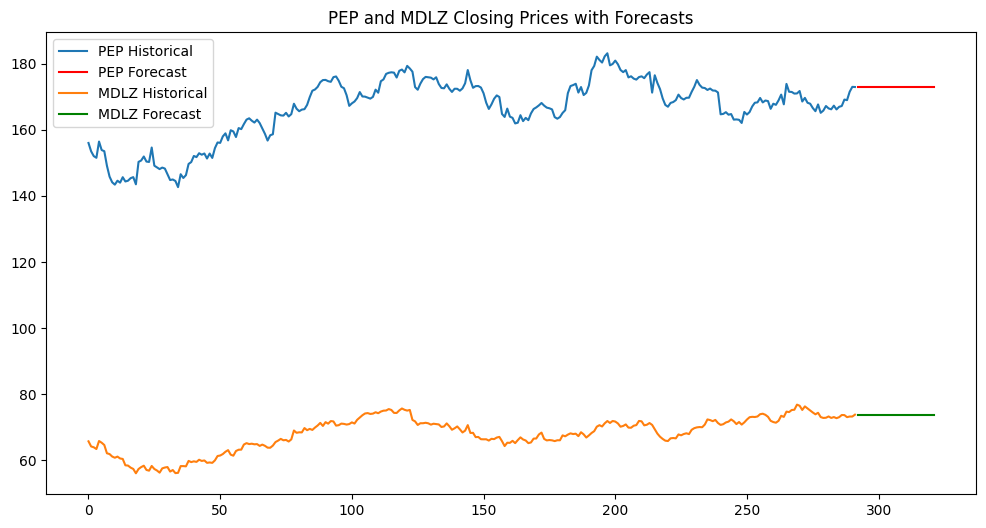

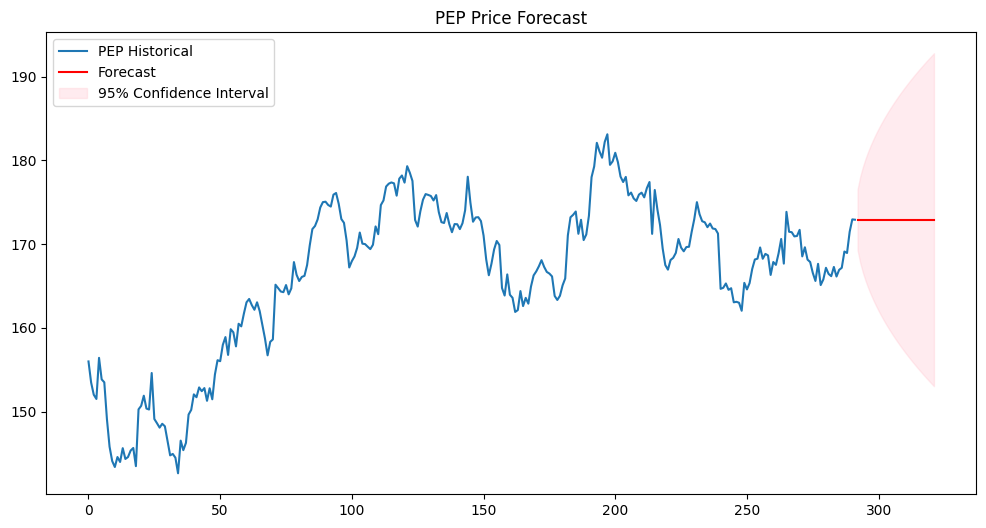

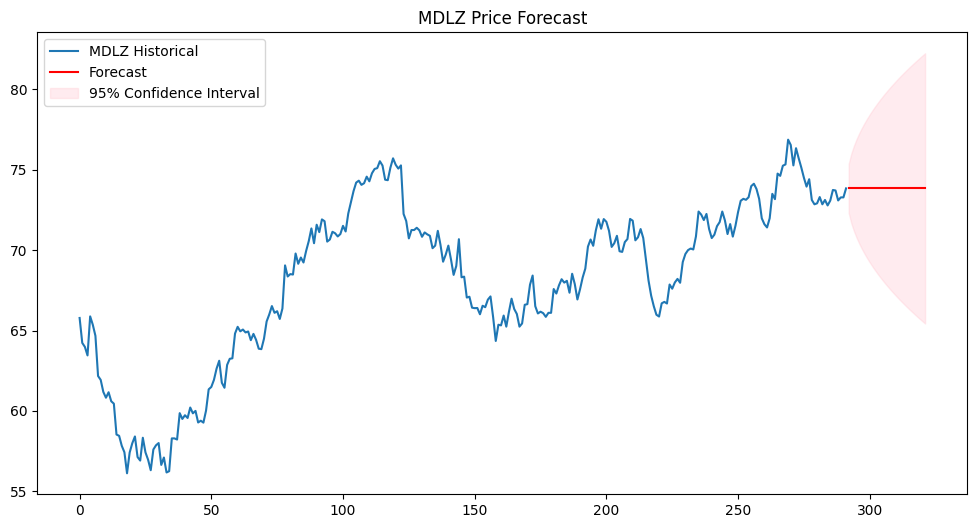


PEP Forecast Values (next 5 periods):
292    172.91
293    172.91
294    172.91
295    172.91
296    172.91
Name: predicted_mean, dtype: float64

MDLZ Forecast Values (next 5 periods):
292    73.84
293    73.84
294    73.84
295    73.84
296    73.84
Name: predicted_mean, dtype: float64


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from google.colab import files
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import matplotlib.pyplot as plt

# Upload Excel files
print("Please upload PEP Excel file")
pep_upload = files.upload()
pep_filename = list(pep_upload.keys())[0]
pep_df = pd.read_excel(pep_filename)

print("Please upload MDLZ Excel file")
mdlz_upload = files.upload()
mdlz_filename = list(mdlz_upload.keys())[0]
mdlz_df = pd.read_excel(mdlz_filename)

# Print available columns
print("\nPEP DataFrame columns:", list(pep_df.columns))
print("MDLZ DataFrame columns:", list(mdlz_df.columns))

# Ask user for the correct column name
close_column = input("Please enter the column name containing closing prices: ")

# Extract closing prices using user-specified column name
try:
    pep_close = pep_df[close_column]
    mdlz_close = mdlz_df[close_column]
except KeyError:
    print(f"Error: Column '{close_column}' not found in one or both DataFrames")
    print("Please check the column names and try again")
    raise

# Ensure both series have the same length
min_length = min(len(pep_close), len(mdlz_close))
pep_close = pep_close[:min_length]
mdlz_close = mdlz_close[:min_length]

# Function for unit root tests
def unit_root_tests(series, name):
    print(f"\nUnit Root Tests for {name}:")

    # ADF Test
    adf_result = adfuller(series)
    print("ADF Test:")
    print(f'ADF Statistic: {adf_result[0]:.4f}')
    print(f'p-value: {adf_result[1]:.4f}')
    print(f'Critical Values: {adf_result[4]}')

    # KPSS Test
    kpss_result = kpss(series)
    print("\nKPSS Test:")
    print(f'KPSS Statistic: {kpss_result[0]:.4f}')
    print(f'p-value: {kpss_result[1]:.4f}')
    print(f'Critical Values: {kpss_result[3]}')

# Perform unit root tests
unit_root_tests(pep_close, "PEP")
unit_root_tests(mdlz_close, "MDLZ")

# Cointegration test
def cointegration_test(df):
    result = coint_johansen(df, det_order=0, k_ar_diff=1)
    print("\nJohansen Cointegration Test:")
    print(f"Trace statistic: {result.lr1}")
    print(f"Critical values (90%, 95%, 99%): {result.cvt}")

    for i in range(len(result.lr1)):
        if result.lr1[i] > result.cvt[i, 1]:
            print(f"r = {i}: Cointegration exists at 95% confidence level")
        else:
            print(f"r = {i}: No cointegration at 95% confidence level")

# Prepare data for cointegration
coint_df = pd.DataFrame({
    'PEP': pep_close,
    'MDLZ': mdlz_close
}).dropna()
cointegration_test(coint_df)

# Function to find best ARIMA model
def find_best_arima(series, name, max_p=3, max_d=2, max_q=3):
    best_aic = float('inf')
    best_order = None

    for p in range(max_p + 1):
        for d in range(max_d + 1):
            for q in range(max_q + 1):
                try:
                    model = ARIMA(series, order=(p, d, q))
                    results = model.fit()
                    if results.aic < best_aic:
                        best_aic = results.aic
                        best_order = (p, d, q)
                except:
                    continue

    print(f"\nBest ARIMA model for {name}:")
    print(f"Order: {best_order}")
    print(f"AIC: {best_aic:.2f}")
    return best_order

# Find and fit best ARIMA models
pep_order = find_best_arima(pep_close, "PEP")
mdlz_order = find_best_arima(mdlz_close, "MDLZ")

# Fit final ARIMA models
pep_model = ARIMA(pep_close, order=pep_order).fit()
mdlz_model = ARIMA(mdlz_close, order=mdlz_order).fit()

# Forecast next 30 periods
forecast_steps = 30
pep_forecast = pep_model.forecast(steps=forecast_steps)
mdlz_forecast = mdlz_model.forecast(steps=forecast_steps)

# Create forecast index (assuming daily data)
last_index = len(pep_close) - 1
forecast_index = range(last_index + 1, last_index + 1 + forecast_steps)

# Plot original series with forecasts
plt.figure(figsize=(12,6))
plt.plot(pep_close, label='PEP Historical')
plt.plot(forecast_index, pep_forecast, label='PEP Forecast', color='red')
plt.plot(mdlz_close, label='MDLZ Historical')
plt.plot(forecast_index, mdlz_forecast, label='MDLZ Forecast', color='green')
plt.title('PEP and MDLZ Closing Prices with Forecasts')
plt.legend()
plt.show()

# Plot detailed forecast with confidence intervals
def plot_forecast(model, series, name, steps=30):
    forecast_obj = model.get_forecast(steps=steps)
    forecast = forecast_obj.predicted_mean
    conf_int = forecast_obj.conf_int()

    forecast_index = range(len(series), len(series) + steps)

    plt.figure(figsize=(12,6))
    plt.plot(series, label=f'{name} Historical')
    plt.plot(forecast_index, forecast, label='Forecast', color='red')
    plt.fill_between(forecast_index,
                    conf_int.iloc[:, 0],
                    conf_int.iloc[:, 1],
                    color='pink',
                    alpha=0.3,
                    label='95% Confidence Interval')
    plt.title(f'{name} Price Forecast')
    plt.legend()
    plt.show()

# Generate detailed forecast plots
plot_forecast(pep_model, pep_close, "PEP")
plot_forecast(mdlz_model, mdlz_close, "MDLZ")

# Print forecast values
print("\nPEP Forecast Values (next 5 periods):")
print(pep_forecast[:5])
print("\nMDLZ Forecast Values (next 5 periods):")
print(mdlz_forecast[:5])

Please upload PEP Excel file


Saving PEP.xlsx to PEP (1).xlsx
Please upload MDLZ Excel file


Saving MDLZ.xlsx to MDLZ (1).xlsx

PEP DataFrame columns: ['Date', '\xa0Open', '\xa0High', '\xa0Low', ' Close', '\xa0Volume']
MDLZ DataFrame columns: ['Date', '\xa0Open', '\xa0High', '\xa0Low', ' Close', '\xa0Volume']
Please enter the column name containing closing prices:  Close

Unit Root Tests for PEP:
ADF Test:
ADF Statistic: -1.7685
p-value: 0.3962
Critical Values: {'1%': -3.453102162983312, '5%': -2.871558538275452, '10%': -2.5721082282996433}
Interpretation:
  - p-value >= 0.05: Fail to reject null - PEP may be non-stationary

KPSS Test:
KPSS Statistic: 1.2888
p-value: 0.0100
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Interpretation:
  - p-value < 0.05: Reject null hypothesis - PEP is non-stationary

Unit Root Tests for MDLZ:
ADF Test:
ADF Statistic: -1.1058
p-value: 0.7127
Critical Values: {'1%': -3.4530232710482367, '5%': -2.871523926671883, '10%': -2.5720897694878424}
Interpretation:
  - p-value >= 0.05: Fail to reject null - MDLZ may be non-stat

<ipython-input-2-c754c34d7146>:60: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series)
<ipython-input-2-c754c34d7146>:60: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/sta


Best ARIMA model for PEP:
Order: (0, 1, 0)
AIC: 1186.13
Interpretation:
  - p=0: 0 autoregressive term(s)
  - d=1: 1 difference(s) needed for stationarity
  - q=0: 0 moving average term(s)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/st


Best ARIMA model for MDLZ:
Order: (0, 1, 0)
AIC: 685.31
Interpretation:
  - p=0: 0 autoregressive term(s)
  - d=1: 1 difference(s) needed for stationarity
  - q=0: 0 moving average term(s)


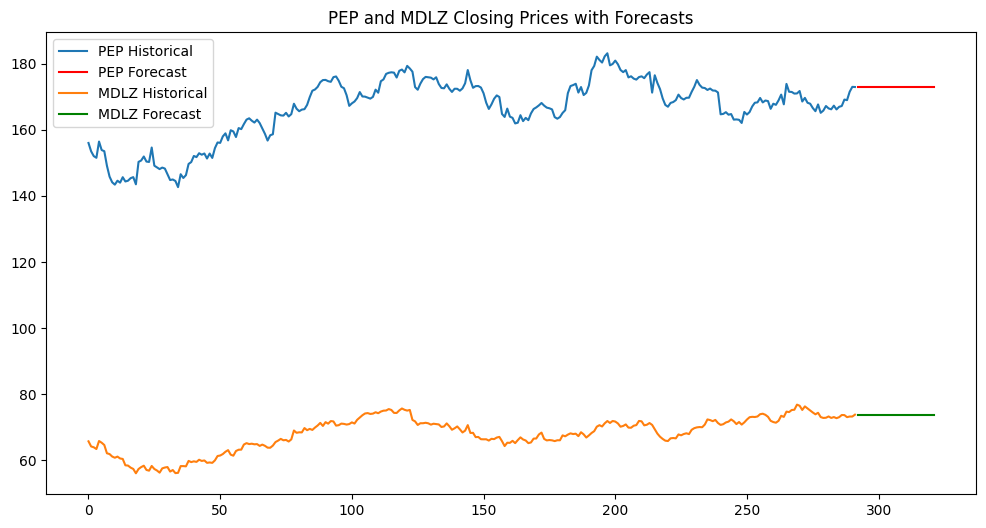

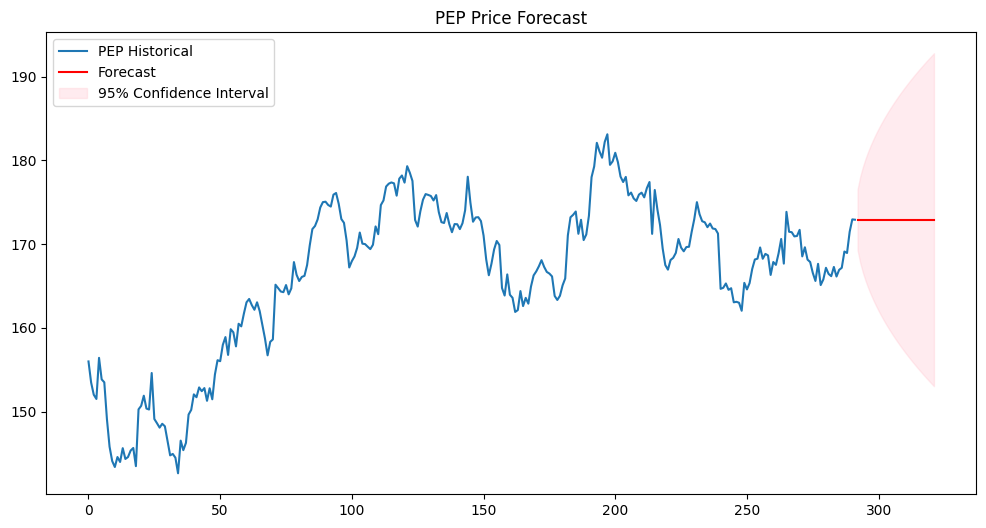


Forecast Interpretation for PEP:
Last observed value: 172.91
Average forecast value: 172.91
Forecast change: -0.00
Trend: Downward forecast trend
95% CI range at period 30: [153.04, 192.78]


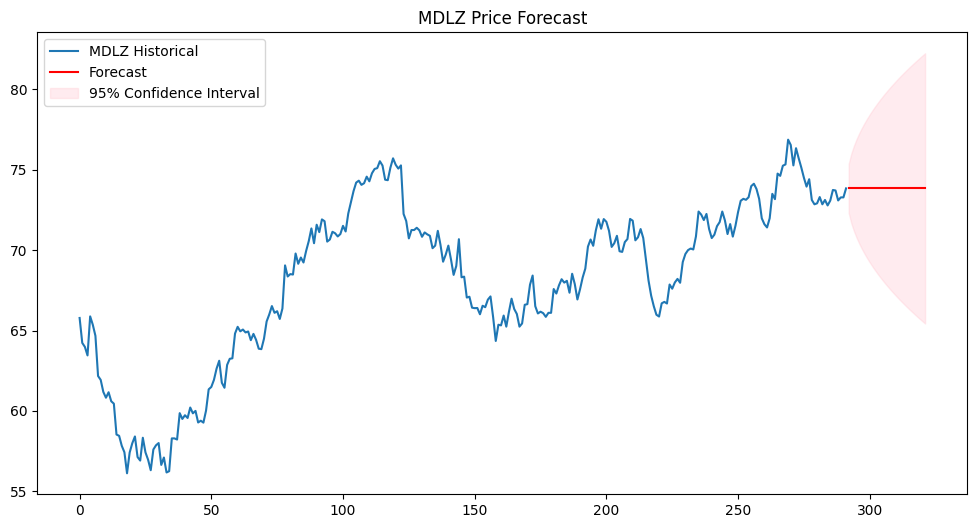


Forecast Interpretation for MDLZ:
Last observed value: 73.84
Average forecast value: 73.84
Forecast change: 0.00
Trend: Flat forecast trend
95% CI range at period 30: [65.44, 82.24]

PEP Forecast Values (next 5 periods):
292    172.91
293    172.91
294    172.91
295    172.91
296    172.91
Name: predicted_mean, dtype: float64

MDLZ Forecast Values (next 5 periods):
292    73.84
293    73.84
294    73.84
295    73.84
296    73.84
Name: predicted_mean, dtype: float64


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from google.colab import files
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import matplotlib.pyplot as plt

# Upload Excel files
print("Please upload PEP Excel file")
pep_upload = files.upload()
pep_filename = list(pep_upload.keys())[0]
pep_df = pd.read_excel(pep_filename)

print("Please upload MDLZ Excel file")
mdlz_upload = files.upload()
mdlz_filename = list(mdlz_upload.keys())[0]
mdlz_df = pd.read_excel(mdlz_filename)

# Print available columns
print("\nPEP DataFrame columns:", list(pep_df.columns))
print("MDLZ DataFrame columns:", list(mdlz_df.columns))

# Ask user for the correct column name
close_column = input("Please enter the column name containing closing prices: ")

# Extract closing prices using user-specified column name
try:
    pep_close = pep_df[close_column]
    mdlz_close = mdlz_df[close_column]
except KeyError:
    print(f"Error: Column '{close_column}' not found in one or both DataFrames")
    print("Please check the column names and try again")
    raise

# Ensure both series have the same length
min_length = min(len(pep_close), len(mdlz_close))
pep_close = pep_close[:min_length]
mdlz_close = mdlz_close[:min_length]

# Function for unit root tests with interpretation
def unit_root_tests(series, name):
    print(f"\nUnit Root Tests for {name}:")

    # ADF Test
    adf_result = adfuller(series)
    print("ADF Test:")
    print(f'ADF Statistic: {adf_result[0]:.4f}')
    print(f'p-value: {adf_result[1]:.4f}')
    print(f'Critical Values: {adf_result[4]}')
    print("Interpretation:")
    if adf_result[1] < 0.05:
        print(f"  - p-value < 0.05: Reject null hypothesis - {name} is stationary")
    else:
        print(f"  - p-value >= 0.05: Fail to reject null - {name} may be non-stationary")

    # KPSS Test
    kpss_result = kpss(series)
    print("\nKPSS Test:")
    print(f'KPSS Statistic: {kpss_result[0]:.4f}')
    print(f'p-value: {kpss_result[1]:.4f}')
    print(f'Critical Values: {kpss_result[3]}')
    print("Interpretation:")
    if kpss_result[1] < 0.05:
        print(f"  - p-value < 0.05: Reject null hypothesis - {name} is non-stationary")
    else:
        print(f"  - p-value >= 0.05: Fail to reject null - {name} may be stationary")

# Perform unit root tests
unit_root_tests(pep_close, "PEP")
unit_root_tests(mdlz_close, "MDLZ")

# Cointegration test with interpretation
def cointegration_test(df):
    result = coint_johansen(df, det_order=0, k_ar_diff=1)
    print("\nJohansen Cointegration Test:")
    print(f"Trace statistic: {result.lr1}")
    print(f"Critical values (90%, 95%, 99%): {result.cvt}")
    print("Interpretation:")
    for i in range(len(result.lr1)):
        if result.lr1[i] > result.cvt[i, 1]:
            print(f"  - r = {i}: Cointegration exists at 95% confidence level")
            print(f"    Trace statistic ({result.lr1[i]:.2f}) > 95% critical value ({result.cvt[i, 1]:.2f})")
        else:
            print(f"  - r = {i}: No cointegration at 95% confidence level")
            print(f"    Trace statistic ({result.lr1[i]:.2f}) <= 95% critical value ({result.cvt[i, 1]:.2f})")
    if result.lr1[0] > result.cvt[0, 1]:
        print("Conclusion: PEP and MDLZ are cointegrated - they share a long-run equilibrium relationship")
    else:
        print("Conclusion: No evidence of cointegration between PEP and MDLZ")

# Prepare data for cointegration
coint_df = pd.DataFrame({
    'PEP': pep_close,
    'MDLZ': mdlz_close
}).dropna()
cointegration_test(coint_df)

# Function to find best ARIMA model with interpretation
def find_best_arima(series, name, max_p=3, max_d=2, max_q=3):
    best_aic = float('inf')
    best_order = None

    for p in range(max_p + 1):
        for d in range(max_d + 1):
            for q in range(max_q + 1):
                try:
                    model = ARIMA(series, order=(p, d, q))
                    results = model.fit()
                    if results.aic < best_aic:
                        best_aic = results.aic
                        best_order = (p, d, q)
                except:
                    continue

    print(f"\nBest ARIMA model for {name}:")
    print(f"Order: {best_order}")
    print(f"AIC: {best_aic:.2f}")
    print("Interpretation:")
    print(f"  - p={best_order[0]}: {best_order[0]} autoregressive term(s)")
    print(f"  - d={best_order[1]}: {best_order[1]} difference(s) needed for stationarity")
    print(f"  - q={best_order[2]}: {best_order[2]} moving average term(s)")
    return best_order

# Find and fit best ARIMA models
pep_order = find_best_arima(pep_close, "PEP")
mdlz_order = find_best_arima(mdlz_close, "MDLZ")

# Fit final ARIMA models
pep_model = ARIMA(pep_close, order=pep_order).fit()
mdlz_model = ARIMA(mdlz_close, order=mdlz_order).fit()

# Forecast next 30 periods
forecast_steps = 30
pep_forecast = pep_model.forecast(steps=forecast_steps)
mdlz_forecast = mdlz_model.forecast(steps=forecast_steps)

# Create forecast index
last_index = len(pep_close) - 1
forecast_index = range(last_index + 1, last_index + 1 + forecast_steps)

# Plot original series with forecasts
plt.figure(figsize=(12,6))
plt.plot(pep_close, label='PEP Historical')
plt.plot(forecast_index, pep_forecast, label='PEP Forecast', color='red')
plt.plot(mdlz_close, label='MDLZ Historical')
plt.plot(forecast_index, mdlz_forecast, label='MDLZ Forecast', color='green')
plt.title('PEP and MDLZ Closing Prices with Forecasts')
plt.legend()
plt.show()

# Detailed forecast plot with confidence intervals and interpretation
def plot_forecast(model, series, name, steps=30):
    forecast_obj = model.get_forecast(steps=steps)
    forecast = forecast_obj.predicted_mean
    conf_int = forecast_obj.conf_int()

    forecast_index = range(len(series), len(series) + steps)

    plt.figure(figsize=(12,6))
    plt.plot(series, label=f'{name} Historical')
    plt.plot(forecast_index, forecast, label='Forecast', color='red')
    plt.fill_between(forecast_index,
                    conf_int.iloc[:, 0],
                    conf_int.iloc[:, 1],
                    color='pink',
                    alpha=0.3,
                    label='95% Confidence Interval')
    plt.title(f'{name} Price Forecast')
    plt.legend()
    plt.show()

    # Forecast interpretation
    last_value = series.iloc[-1]
    mean_forecast = forecast.mean()
    print(f"\nForecast Interpretation for {name}:")
    print(f"Last observed value: {last_value:.2f}")
    print(f"Average forecast value: {mean_forecast:.2f}")
    print(f"Forecast change: {mean_forecast - last_value:.2f}")
    if mean_forecast > last_value:
        print("Trend: Upward forecast trend")
    elif mean_forecast < last_value:
        print("Trend: Downward forecast trend")
    else:
        print("Trend: Flat forecast trend")
    print(f"95% CI range at period {steps}: [{conf_int.iloc[-1, 0]:.2f}, {conf_int.iloc[-1, 1]:.2f}]")

# Generate detailed forecast plots and interpretations
plot_forecast(pep_model, pep_close, "PEP")
plot_forecast(mdlz_model, mdlz_close, "MDLZ")

# Print forecast values
print("\nPEP Forecast Values (next 5 periods):")
print(pep_forecast[:5])
print("\nMDLZ Forecast Values (next 5 periods):")
print(mdlz_forecast[:5])

Please upload PEP Excel file


Saving PEP.xlsx to PEP (2).xlsx
Please upload MDLZ Excel file


Saving MDLZ.xlsx to MDLZ (2).xlsx

PEP DataFrame columns: ['Date', '\xa0Open', '\xa0High', '\xa0Low', ' Close', '\xa0Volume']
MDLZ DataFrame columns: ['Date', '\xa0Open', '\xa0High', '\xa0Low', ' Close', '\xa0Volume']
Please enter the column name containing closing prices:  Close


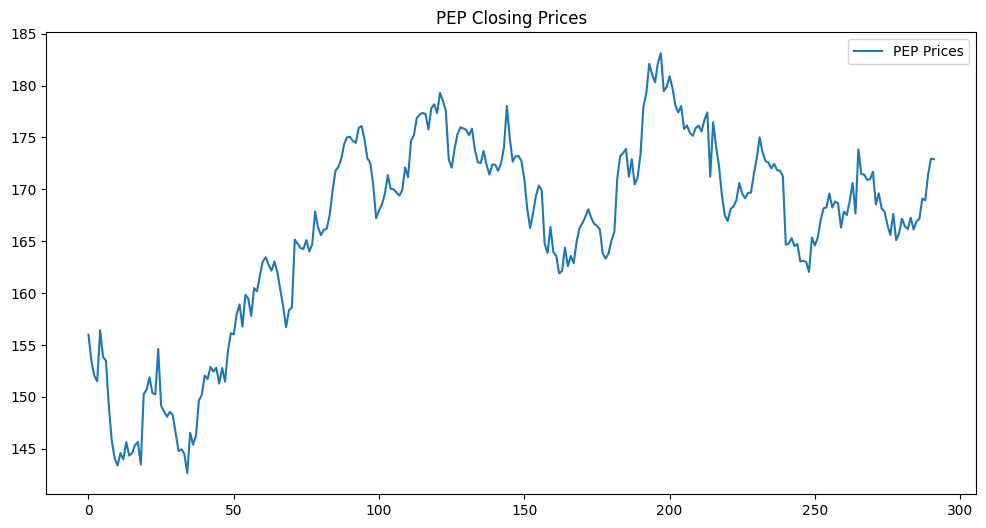

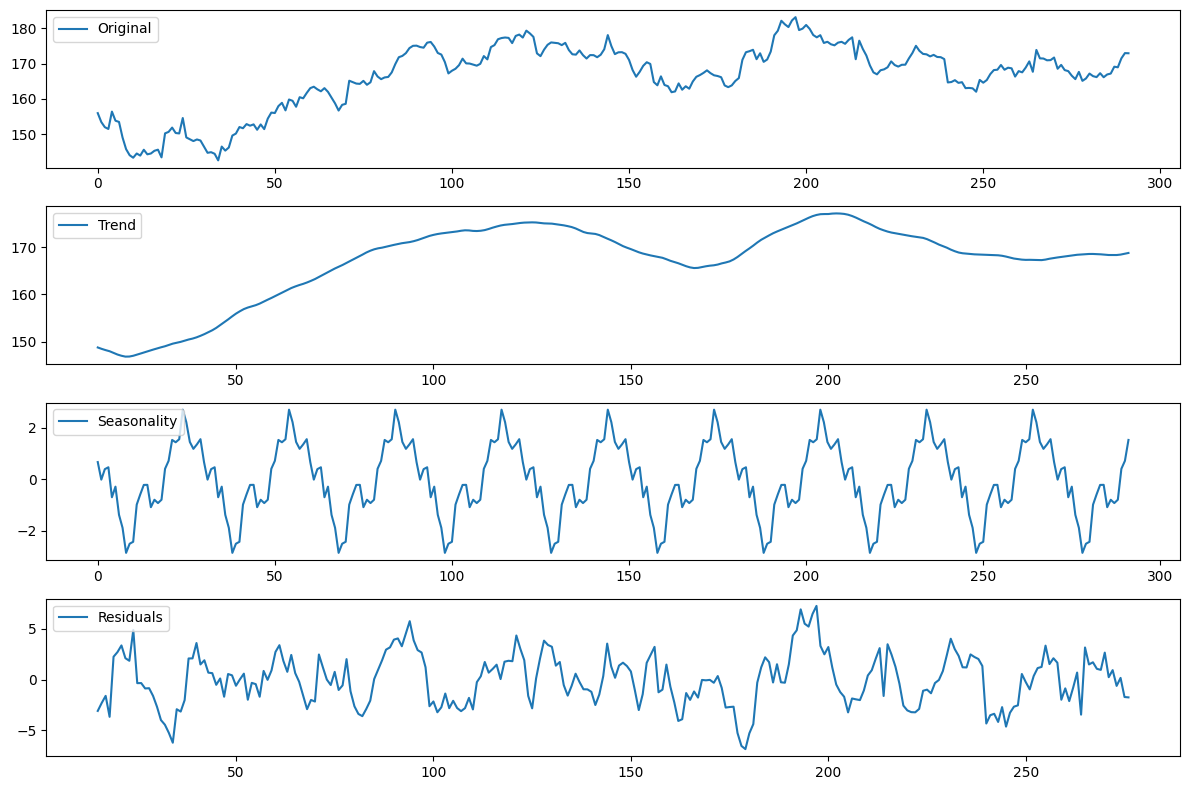


Analysis for PEP:
- Trend: Look at the trend plot - if it slopes up/down, there’s a trend.
- Seasonality: Check the seasonality plot - repeating patterns indicate seasonality.


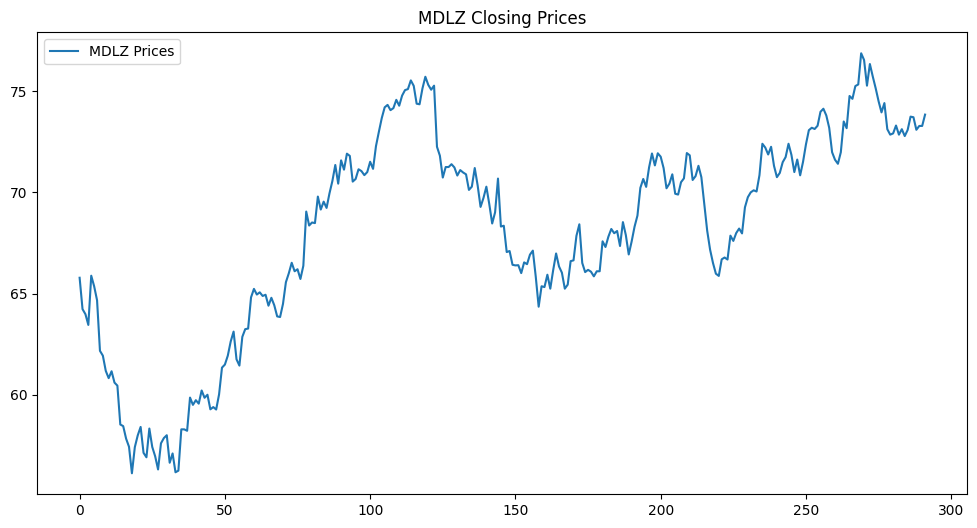

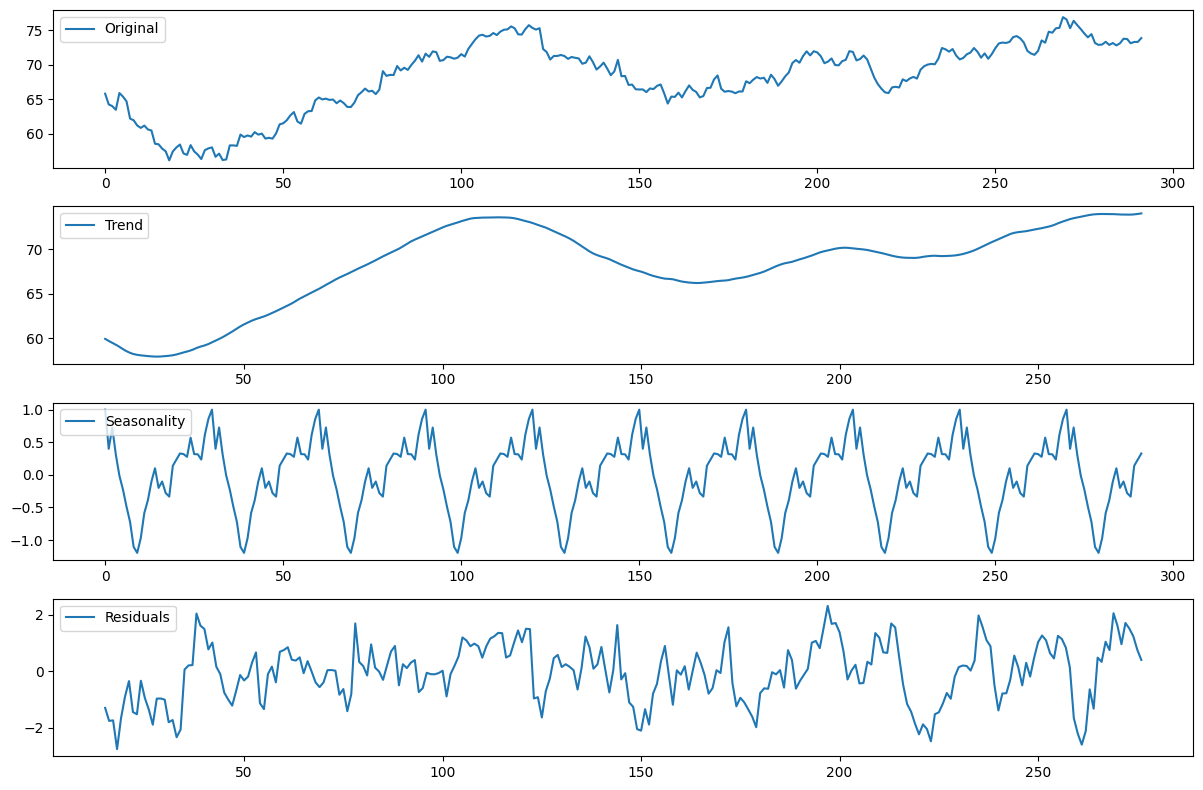


Analysis for MDLZ:
- Trend: Look at the trend plot - if it slopes up/down, there’s a trend.
- Seasonality: Check the seasonality plot - repeating patterns indicate seasonality.

Unit Root Tests for PEP:
ADF Test:
ADF Statistic: -1.7685
p-value: 0.3962
Critical Values: {'1%': -3.453102162983312, '5%': -2.871558538275452, '10%': -2.5721082282996433}
Interpretation:
  - p-value >= 0.05: Fail to reject null - PEP may be non-stationary

KPSS Test:
KPSS Statistic: 1.2888
p-value: 0.0100
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Interpretation:
  - p-value < 0.05: Reject null hypothesis - PEP is non-stationary

Unit Root Tests for MDLZ:
ADF Test:
ADF Statistic: -1.1058
p-value: 0.7127
Critical Values: {'1%': -3.4530232710482367, '5%': -2.871523926671883, '10%': -2.5720897694878424}
Interpretation:
  - p-value >= 0.05: Fail to reject null - MDLZ may be non-stationary

KPSS Test:
KPSS Statistic: 1.4167
p-value: 0.0100
Critical Values: {'10%': 0.347, '5%': 0.463, 

<ipython-input-3-1b7f47d7dc9e>:98: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series)
<ipython-input-3-1b7f47d7dc9e>:98: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/sta


Best ARIMA model for PEP:
Order: (0, 1, 0)
AIC: 1063.88


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/st


Best ARIMA model for MDLZ:
Order: (0, 1, 0)
AIC: 618.53


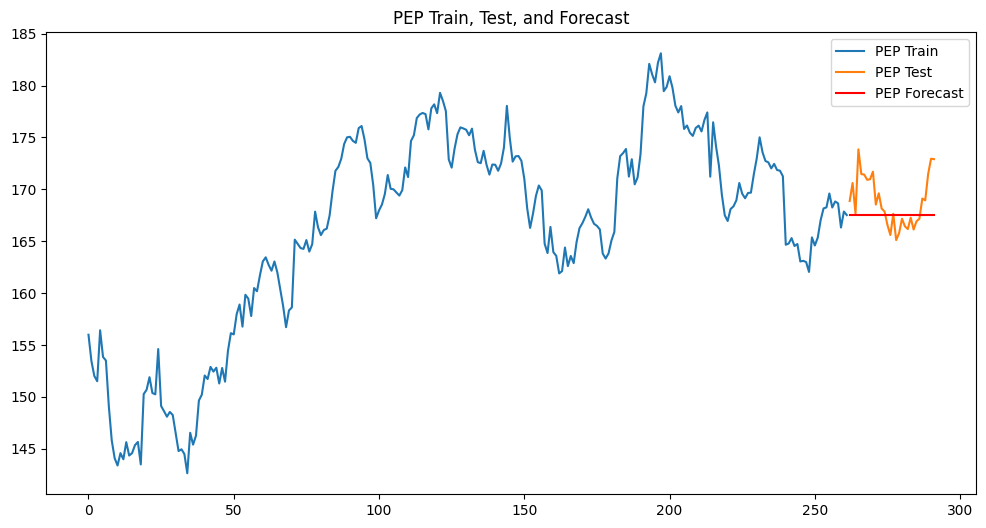

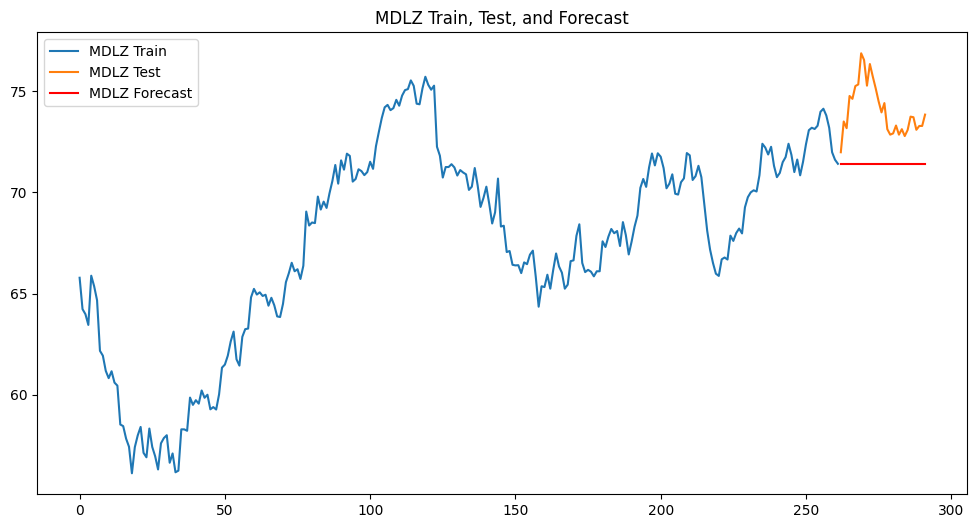


Forecast Accuracy:
PEP Mean Squared Error: 7.56
MDLZ Mean Squared Error: 8.64


In [3]:
# Import required libraries
import pandas as pd
import numpy as np
from google.colab import files
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import matplotlib.pyplot as plt

# Upload Excel files
print("Please upload PEP Excel file")
pep_upload = files.upload()
pep_filename = list(pep_upload.keys())[0]
pep_df = pd.read_excel(pep_filename)

print("Please upload MDLZ Excel file")
mdlz_upload = files.upload()
mdlz_filename = list(mdlz_upload.keys())[0]
mdlz_df = pd.read_excel(mdlz_filename)

# Print available columns
print("\nPEP DataFrame columns:", list(pep_df.columns))
print("MDLZ DataFrame columns:", list(mdlz_df.columns))

# Ask user for the correct column name
close_column = input("Please enter the column name containing closing prices: ")

# Extract closing prices using user-specified column name
try:
    pep_close = pep_df[close_column]
    mdlz_close = mdlz_df[close_column]
except KeyError:
    print(f"Error: Column '{close_column}' not found in one or both DataFrames")
    print("Please check the column names and try again")
    raise

# Ensure both series have the same length
min_length = min(len(pep_close), len(mdlz_close))
pep_close = pep_close[:min_length].dropna()
mdlz_close = mdlz_close[:min_length].dropna()

# Step 1: Determine trend and seasonality
def plot_trend_seasonality(series, name):
    plt.figure(figsize=(12, 6))
    plt.plot(series, label=f'{name} Prices')
    plt.title(f'{name} Closing Prices')
    plt.legend()
    plt.show()

    # Decomposition (assuming daily data; adjust period if needed, e.g., 365 for yearly)
    decomposition = seasonal_decompose(series, model='additive', period=30)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.figure(figsize=(12, 8))
    plt.subplot(411)
    plt.plot(series, label='Original')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonality')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

    print(f"\nAnalysis for {name}:")
    print("- Trend: Look at the trend plot - if it slopes up/down, there’s a trend.")
    print("- Seasonality: Check the seasonality plot - repeating patterns indicate seasonality.")

plot_trend_seasonality(pep_close, "PEP")
plot_trend_seasonality(mdlz_close, "MDLZ")

# Step 2: Determine if data are stationary
def unit_root_tests(series, name):
    print(f"\nUnit Root Tests for {name}:")

    # ADF Test
    adf_result = adfuller(series)
    print("ADF Test:")
    print(f'ADF Statistic: {adf_result[0]:.4f}')
    print(f'p-value: {adf_result[1]:.4f}')
    print(f'Critical Values: {adf_result[4]}')
    print("Interpretation:")
    if adf_result[1] < 0.05:
        print(f"  - p-value < 0.05: Reject null hypothesis - {name} is stationary")
    else:
        print(f"  - p-value >= 0.05: Fail to reject null - {name} may be non-stationary")

    # KPSS Test
    kpss_result = kpss(series)
    print("\nKPSS Test:")
    print(f'KPSS Statistic: {kpss_result[0]:.4f}')
    print(f'p-value: {kpss_result[1]:.4f}')
    print(f'Critical Values: {kpss_result[3]}')
    print("Interpretation:")
    if kpss_result[1] < 0.05:
        print(f"  - p-value < 0.05: Reject null hypothesis - {name} is non-stationary")
    else:
        print(f"  - p-value >= 0.05: Fail to reject null - {name} may be stationary")

unit_root_tests(pep_close, "PEP")
unit_root_tests(mdlz_close, "MDLZ")

# Step 3: Split data into train (90%) and test (10%)
train_size = int(len(pep_close) * 0.9)
pep_train, pep_test = pep_close[:train_size], pep_close[train_size:]
mdlz_train, mdlz_test = mdlz_close[:train_size], mdlz_close[train_size:]

print(f"\nData Split:")
print(f"PEP - Train size: {len(pep_train)}, Test size: {len(pep_test)}")
print(f"MDLZ - Train size: {len(mdlz_train)}, Test size: {len(mdlz_test)}")

# Function to find best ARIMA model
def find_best_arima(series, name, max_p=3, max_d=2, max_q=3):
    best_aic = float('inf')
    best_order = None

    for p in range(max_p + 1):
        for d in range(max_d + 1):
            for q in range(max_q + 1):
                try:
                    model = ARIMA(series, order=(p, d, q))
                    results = model.fit()
                    if results.aic < best_aic:
                        best_aic = results.aic
                        best_order = (p, d, q)
                except:
                    continue

    print(f"\nBest ARIMA model for {name}:")
    print(f"Order: {best_order}")
    print(f"AIC: {best_aic:.2f}")
    return best_order

# Find and fit best ARIMA models on training data
pep_order = find_best_arima(pep_train, "PEP")
mdlz_order = find_best_arima(mdlz_train, "MDLZ")

# Fit final ARIMA models
pep_model = ARIMA(pep_train, order=pep_order).fit()
mdlz_model = ARIMA(mdlz_train, order=mdlz_order).fit()

# Forecast for the test period
test_steps = len(pep_test)
pep_forecast = pep_model.forecast(steps=test_steps)
mdlz_forecast = mdlz_model.forecast(steps=test_steps)

# Plot training, test, and forecast
def plot_train_test_forecast(train, test, forecast, name):
    forecast_index = range(len(train), len(train) + len(test))
    plt.figure(figsize=(12, 6))
    plt.plot(train, label=f'{name} Train')
    plt.plot(range(len(train), len(train) + len(test)), test, label=f'{name} Test')
    plt.plot(forecast_index, forecast, label=f'{name} Forecast', color='red')
    plt.title(f'{name} Train, Test, and Forecast')
    plt.legend()
    plt.show()

plot_train_test_forecast(pep_train, pep_test, pep_forecast, "PEP")
plot_train_test_forecast(mdlz_train, mdlz_test, mdlz_forecast, "MDLZ")

# Optional: Evaluate forecast accuracy
from sklearn.metrics import mean_squared_error
pep_mse = mean_squared_error(pep_test, pep_forecast)
mdlz_mse = mean_squared_error(mdlz_test, mdlz_forecast)
print(f"\nForecast Accuracy:")
print(f"PEP Mean Squared Error: {pep_mse:.2f}")
print(f"MDLZ Mean Squared Error: {mdlz_mse:.2f}")